1900
        Name Gender  Count
4       Ruth      F   4765
756   Robert      F     24
2229  Robert      M   3821
2868    Ruth      M     16
        Count
Name         
Robert   3845
Ruth     4781
2000
         Name Gender  Count
340      Ruth      F    903
5113   Robert      F     23
17681  Robert      M  13737
        Count
Name         
Robert  13760
Ruth      903


,level_0,Name,Count
0,1900,Robert,3845
1,1900,Ruth,4781
2,2000,Robert,13760
3,2000,Ruth,903


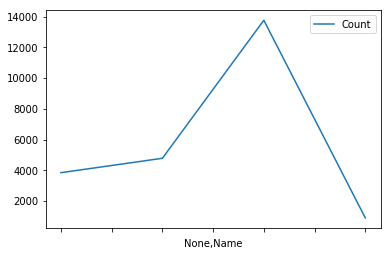

In [78]:
#1 Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
#делаем через функцию
def concat_names(target_years):
    import pandas as pd
    DATA_PATH = "D:DataS\YOB"
    names_dict = {}
#циклом пробегаем по нужным нам годам, загружаем данные, обрезаем только нужные нам два имени
    for target_year in target_years:
        print(target_year)
        all_names = pd.read_csv(f"{DATA_PATH}\yob{target_year}.txt", names = ["Name", "Gender", "Count"])
        names_RR = all_names[(all_names.Name == "Ruth")|(all_names.Name == "Robert")]
        print(names_RR)
#дополнительные телодвижения, чтобы учесть мужчин-Рут и женщин-Роберт
        names_RR = names_RR.groupby("Name").sum()
        print(names_RR)
#подгружаем данные в словарь по ключу "Год"
        names_dict[target_year] =  names_RR
#склеиваем данные и строим график - что-то идёт не так)
    names_all = pd.concat(names_dict)
    names_all.plot()
    return names_all.reset_index()
concat_names([1900, 2000])





             Count
     Name         
1900 Robert   3845
     Ruth     4781
1905 Robert   3431
     Ruth     5088
1910 Robert   5638
     Ruth     7247
1915 Robert  28854
     Ruth    21924
1920 Robert  48883
     Ruth    26155
1925 Robert  61246
     Ruth    22325
1930 Robert  62572
     Ruth    15010
1935 Robert  56755
     Ruth    10041
1940 Robert  61401
     Ruth     8922
1945 Robert  70132
     Ruth     8063
1950 Robert  83768
     Ruth     7138
1955 Robert  83953
     Ruth     6200
1960 Robert  72640
     Ruth     4960
1965 Robert  63389
     Ruth     3242
1970 Robert  57529
     Ruth     1828
1975 Robert  35579
     Ruth     1235
1980 Robert  34535
     Ruth     1262
1985 Robert  32326
     Ruth     1125
1990 Robert  28980
     Ruth      913
1995 Robert  18627
     Ruth      858
2000 Robert  13760
     Ruth      903


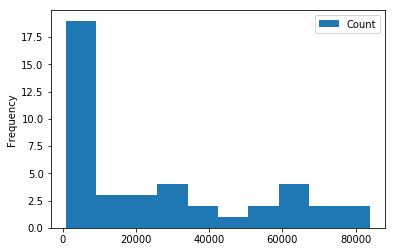

In [71]:
#2 Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
#а тут пробуем без функции, голым кодом
names_dict = {}
#циклом пробегаем по нужным нам годам, загружаем данные, обрезаем только нужные нам два имени
for year in range (1900, 2001, 5):
    all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_RR = all_names[(all_names.Name == "Ruth")|(all_names.Name == "Robert")]
    names_RR = names_RR.groupby("Name").sum()
    names_dict[year] =  names_RR
#в прицнипе всё аналогично, просто данных намного больше, результат столь же кривой почему-то
names_all = pd.concat(names_dict)
print(names_all)
names_all.plot.hist(by="Year")

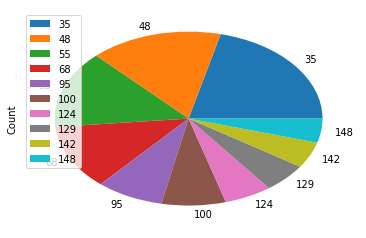

In [13]:
#3 Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
names_1950 = pd.read_csv(f"{DATA_PATH}\yob1950.txt", names = ["Name", "Gender", "Count"])
names_1950[(names_1950.Name.str.startswith("R"))].head(10).plot.pie(y="Count")
#тут криво, но вроде бы правильно

           Name    Count  Cons
0         James  4810303     3
1          John  4739978     3
2        Robert  4638964     4
3       Michael  4023311     4
4          Mary  3853769     3
5       William  3655351     4
6         David  3351325     3
7       Richard  2493119     5
8        Joseph  2289781     4
9       Charles  2189698     5
10       Thomas  2122388     4
11  Christopher  1763929     8
                  Name  Count  Cons
37042  Ryanchristopher     35    11
25209  Johnchristopher    103    11
34217  Christophermich     45    11
58241  Markchristopher      6    11
25807  Christopherjohn     97    11
50995  Christopherryan     11    11
64990  Jordanchristoph      5    11
63826  Kevinchristophe      5    10
49640      Krystallynn     12    10
50518  Christiananthon     12    10
29927      Crystallynn     66    10
56634  Christopherjose      7    10
       Name  Count  Cons
1100    Zoe  28642     1
42867  Dieu     22     1
37658  Jaie     34     1
39154   Joa     30     1
4282

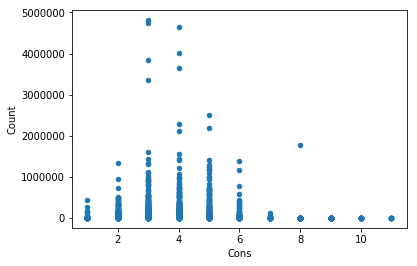

In [101]:
#4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

def count_cons(row):
    return len([c for c in row.Name if c not in 'aeiou'])

names_dict = {}
#снова циклом пробегаем по всем годам, загружаем данные, обрезаем только нужные нам два имени
for year in range (1900, 2001):
    all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_dict[year] =  all_names
#в прицнипе всё аналогично, просто данных намного больше, и каждый шаг приходится принтом проверять, что именно получается
names = pd.concat(names_dict)
names = names.groupby("Name").sum()
names = names.sort_values(by=["Count"], ascending=False)
names = names.reset_index()
names["Cons"] = names.apply(count_cons, axis=1)
print(names.head(12))
print(names.sort_values(by=["Cons"], ascending=False).head(12))
print(names.sort_values(by=["Cons"], ascending=True).head(12))
#а вот этим графиком я доволен. ОН не кривой и более менее информативный. Сразу видна "аномалия" - разные варианты Кристофер с его 11 согласными буквам и короткие азиатские именаб а также Зоя.
names.plot.scatter(x="Cons", y="Count")
